# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(api_key)

d2f3c9adb0ac34504aca3d67da74fa27


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [5]:
print(cities)

['cidreira', 'fairbanks', 'hovd', 'potgietersrus', 'naugarzan', 'provideniya', 'yellowknife', 'atuona', 'kodiak', 'esperance', 'yar-sale', 'barrow', 'waipawa', 'mataura', 'tuktoyaktuk', 'ninghai', 'karema', 'tallahassee', 'paraguacu', 'hilo', 'taolanaro', 'the valley', 'ushuaia', 'moussoro', 'manono', 'avera', 'leh', 'ribeira grande', 'sakakah', 'hobart', 'shahrud', 'saint george', 'carnarvon', 'nyurba', 'rikitea', 'punta arenas', 'hermanus', 'tumannyy', 'airai', 'jamestown', 'avarua', 'amderma', 'tidore', 'arraial do cabo', 'jibuti', 'envira', 'bredasdorp', 'busselton', 'nikolskoye', 'grindavik', 'port lincoln', 'ponta do sol', 'kyzyl', 'skibbereen', 'guerrero negro', 'kapaa', 'longyearbyen', 'lima', 'cape town', 'albany', 'vestmannaeyjar', 'oktyabrskiy', 'port-gentil', 'port alfred', 'vaini', 'cherskiy', 'saleaula', 'bethel', 'bluff', 'ust-kamchatsk', 'mao', 'thompson', 'kailua', 'bismarck', 'college', 'hasaki', 'khatanga', 'boshnyakovo', 'flin flon', 'bandrele', 'kumbo', 'yulara', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d2f3c9adb0ac34504aca3d67da74fa27&units=metric&q=


In [7]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
        
        
print(len(weather_response))
    

processing Record 1 of Set 1 | cidreira
processing Record 2 of Set 1 | fairbanks
processing Record 3 of Set 1 | hovd
processing Record 4 of Set 1 | potgietersrus
City not found: potgietersrus
processing Record 5 of Set 1 | naugarzan
City not found: naugarzan
processing Record 6 of Set 1 | provideniya
processing Record 7 of Set 1 | yellowknife
processing Record 8 of Set 1 | atuona
processing Record 9 of Set 1 | kodiak
processing Record 10 of Set 1 | esperance
processing Record 11 of Set 1 | yar-sale
processing Record 12 of Set 1 | barrow
processing Record 13 of Set 1 | waipawa
processing Record 14 of Set 1 | mataura
processing Record 15 of Set 1 | tuktoyaktuk
processing Record 16 of Set 1 | ninghai
processing Record 17 of Set 1 | karema
processing Record 18 of Set 1 | tallahassee
processing Record 19 of Set 1 | paraguacu
processing Record 20 of Set 1 | hilo
processing Record 21 of Set 1 | taolanaro
City not found: taolanaro
processing Record 22 of Set 1 | the valley
processing Record 23

processing Record 34 of Set 4 | yingkou
processing Record 35 of Set 4 | chagda
City not found: chagda
processing Record 36 of Set 4 | olinda
processing Record 37 of Set 4 | bhandara
processing Record 38 of Set 4 | chokurdakh
processing Record 39 of Set 4 | ostrovnoy
processing Record 40 of Set 4 | bilibino
processing Record 41 of Set 4 | nueva guinea
processing Record 42 of Set 4 | iqaluit
processing Record 43 of Set 4 | kikinda
processing Record 44 of Set 4 | marsh harbour
processing Record 45 of Set 4 | hobyo
processing Record 46 of Set 4 | kokoda
processing Record 47 of Set 4 | kuraymah
processing Record 48 of Set 4 | kavaratti
processing Record 49 of Set 4 | shingu
processing Record 50 of Set 4 | tabuk
5
0
200
processing Record 1 of Set 5 | penzance
processing Record 2 of Set 5 | mercedes
processing Record 3 of Set 5 | kaitangata
processing Record 4 of Set 5 | bonavista
processing Record 5 of Set 5 | katsuura
processing Record 6 of Set 5 | muros
processing Record 7 of Set 5 | ancho

processing Record 18 of Set 8 | barranca
processing Record 19 of Set 8 | kirakira
processing Record 20 of Set 8 | cacule
processing Record 21 of Set 8 | synya
processing Record 22 of Set 8 | castlegar
processing Record 23 of Set 8 | klaksvik
processing Record 24 of Set 8 | trenggalek
processing Record 25 of Set 8 | padang
processing Record 26 of Set 8 | necochea
processing Record 27 of Set 8 | nuuk
processing Record 28 of Set 8 | qaqortoq
processing Record 29 of Set 8 | mundo nuevo
processing Record 30 of Set 8 | mikhaylovka
processing Record 31 of Set 8 | kachikau
City not found: kachikau
processing Record 32 of Set 8 | forrest city
processing Record 33 of Set 8 | goderich
processing Record 34 of Set 8 | saint-georges
processing Record 35 of Set 8 | malindi
processing Record 36 of Set 8 | save
processing Record 37 of Set 8 | palatka
processing Record 38 of Set 8 | mogadishu
processing Record 39 of Set 8 | abong mbang
processing Record 40 of Set 8 | kelo
City not found: kelo
processing

processing Record 3 of Set 12 | yeppoon
processing Record 4 of Set 12 | risaralda
processing Record 5 of Set 12 | vigrestad
processing Record 6 of Set 12 | hun
processing Record 7 of Set 12 | neubrandenburg
processing Record 8 of Set 12 | kharitonovo
processing Record 9 of Set 12 | paucartambo
City not found: paucartambo
processing Record 10 of Set 12 | letka
processing Record 11 of Set 12 | kalmunai
processing Record 12 of Set 12 | realeza
processing Record 13 of Set 12 | vila velha
processing Record 14 of Set 12 | rudbar
City not found: rudbar
processing Record 15 of Set 12 | dingle
processing Record 16 of Set 12 | lata
processing Record 17 of Set 12 | asayita
City not found: asayita
processing Record 18 of Set 12 | novoorsk
processing Record 19 of Set 12 | cabedelo
processing Record 20 of Set 12 | taoudenni
processing Record 21 of Set 12 | srednekolymsk
processing Record 22 of Set 12 | noshiro
processing Record 23 of Set 12 | bundaberg
processing Record 24 of Set 12 | huron
processi

In [8]:
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

524
524
524
524
524
524
524


In [9]:
weather_dict = {"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Cidreira,-30.17,-50.22,20.19,98,100,4.56
1,Fairbanks,64.84,-147.72,13.89,27,1,3.26
2,Hovd,63.83,10.70,2.78,80,20,1.50
3,Provideniya,64.42,-173.23,-8.00,61,40,7.00
4,Yellowknife,62.45,-114.38,-0.57,86,90,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

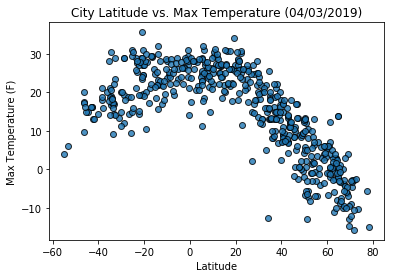

In [11]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/03/2019)")
plt.savefig("Max_temp.png")

#### Latitude vs. Humidity Plot

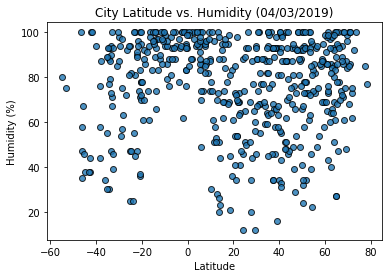

In [12]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/03/2019)")
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

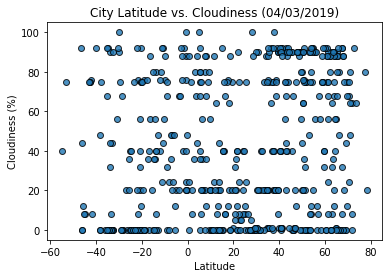

In [13]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/03/2019)")
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

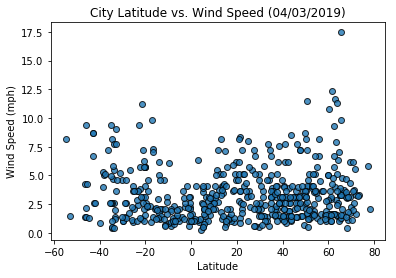

In [14]:
plt.scatter(weather_df['lat'], weather_df['windspeed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/03/2019)")
plt.savefig("Wind_Speed.png")